# import necassry library that needed for this assignments

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns 
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

# Forest Fire

## problem statment 

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
#load the forestfires dataset form the github repo 
df1=pd.read_csv("https://raw.githubusercontent.com/AliHumadi2000/Neual-Network/main/forestfires.csv")

<h3 style="color:red">Data understaning and exploring 

In [3]:
# visulize the first 10 columns 
df1.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [4]:
# basic infromatino about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# shape of the dataset 
df1.shape
# 517 rows 
# 31 columns 

(517, 31)

In [6]:
# datatypes 
df1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
# basic statastics of numerical features 
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [8]:
# check if any missing or duplicated values 

In [9]:
df1.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
df1.duplicated().sum()
# there is 8 duplicate values 

8

In [11]:
df1[df1.duplicated()] # this is the duplicated values 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
df1=df1.drop_duplicates()
df1.shape

(509, 31)

# Data Visulization

In [13]:
df1.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

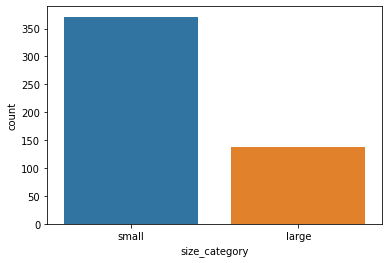

In [14]:
# plot the size of the fire category
sns.countplot(df1.size_category)
plt.show()

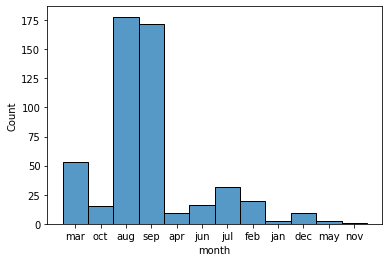

In [15]:
# distibution of months and day 
sns.histplot(df1['month'])
plt.show()
# in aug and sep we can see the more records

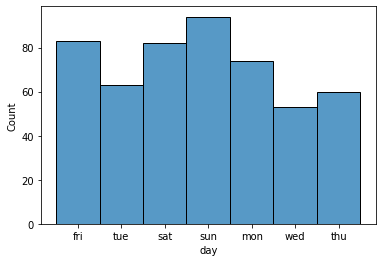

In [16]:
sns.histplot(df1.day)
plt.show()

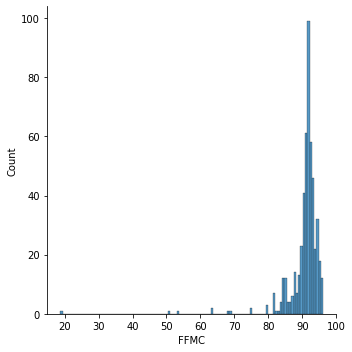

In [17]:
#distubtion of features
sns.displot(df1['FFMC'])
plt.show()

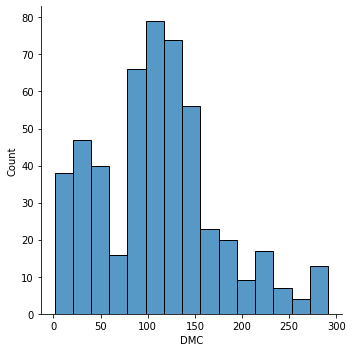

In [18]:
sns.displot(df1['DMC'])
plt.show()
#not normaly 

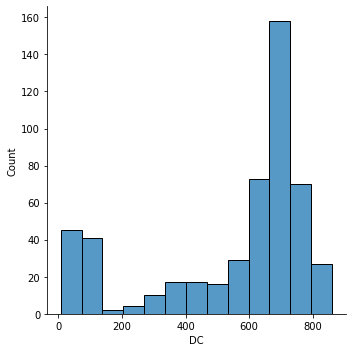

In [19]:
sns.displot(df1['DC'])
plt.show()

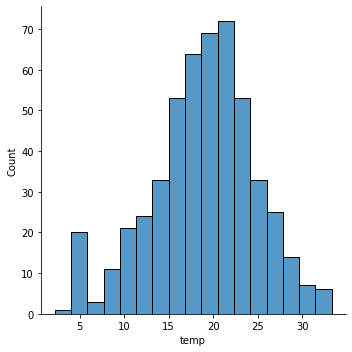

In [20]:
sns.displot(df1['temp'])
plt.show()
#for temp

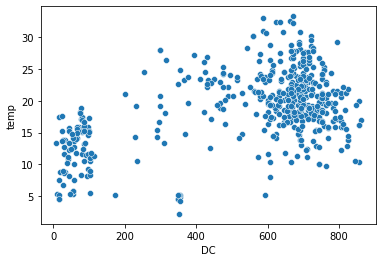

In [21]:
#relation between Dc and temp
sns.scatterplot(df1['DC'],df1['temp'])
plt.show()

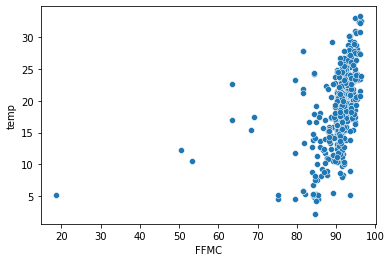

In [22]:
#relation between fine fuel moisture code and temp
sns.scatterplot(df1['FFMC'],df1['temp'])
plt.show()

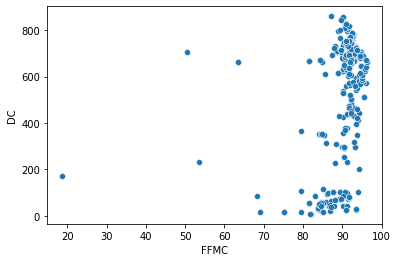

In [23]:
#relation between fine fuel moisture code and DC
sns.scatterplot(df1['FFMC'],df1['DC'])
plt.show()

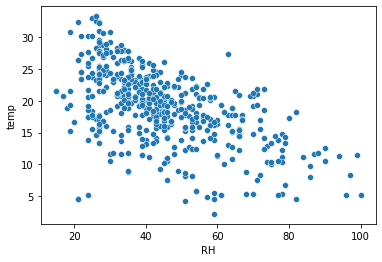

In [24]:
#relation between temp and RH
sns.scatterplot(df1['RH'],df1['temp'])
plt.show()

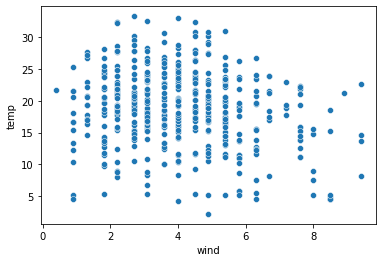

In [25]:
#relation between temp and wind
sns.scatterplot(df1['wind'],df1['temp'])
plt.show()

# Data processing 

In [26]:
#drop unwanted features
df1.drop(columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed'],inplace=True)
df1.drop(columns=['monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],inplace=True)

In [27]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [28]:
#convert categorical to numerical 
label_encoder=LabelEncoder()
df1['M']=label_encoder.fit_transform(df1['month'])
df1['D']=label_encoder.fit_transform(df1['day'])

In [29]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,M,D
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,7,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,10,5
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,10,2
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,7,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,1,3
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1,3
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,1,3
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,1,2


In [30]:
df1.drop(columns='month',inplace=True)
df1.drop(columns='day',inplace=True)

In [31]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,M,D
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,7,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,10,5
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,10,2
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,7,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,1,3
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1,3
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,1,3
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,1,2


In [32]:
df1['size']=label_encoder.fit_transform(df1['size_category'])

In [33]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,M,D,size
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,7,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,10,5,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,10,2,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,7,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,1,3,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1,3,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,1,3,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,1,2,1


In [34]:
df1.drop(columns='size_category',inplace=True)

In [35]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,M,D,size
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,7,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,5,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,2,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,7,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,3,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,3,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,3,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1,2,1


In [36]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [37]:
#features 
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,M,D
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,7,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,5
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,2
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,7,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,7,3
...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,3
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,3
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,3
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1,2


In [38]:
#target
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size, Length: 509, dtype: int32

In [39]:
# Model

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(17,input_dim=11,activation='sigmoid'))
model.add(tf.keras.layers.Dense(8,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                204       
                                                                 
 dense_1 (Dense)             (None, 8)                 144       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile model
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Fit the model
model_fit=model.fit(X,Y,batch_size=70,validation_split=0.25,epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 80ms/step - loss: 0.6595 - accuracy: 0.7454 - val_loss: 0.6589 - val_accuracy: 0.6797
Epoch 2/100
6/6 [==============================] - 0s 41ms/step - loss: 0.6407 - accuracy: 0.7454 - val_loss: 0.6485 - val_accuracy: 0.6797
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6258 - accuracy: 0.7454 - val_loss: 0.6401 - val_accuracy: 0.6797
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6126 - accuracy: 0.7454 - val_loss: 0.6339 - val_accuracy: 0.6797
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6018 - accuracy: 0.7454 - val_loss: 0.6294 - val_accuracy: 0.6797
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5920 - accuracy: 0.7454 - val_loss: 0.6267 - val_accuracy: 0.6797
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5855 - accuracy: 0.7454 - val_loss: 0.6251 - val_accuracy: 0.6797
Epoch 8/100
6/6 [======

In [43]:
# Evaluating the model
score= model.evaluate(X,Y)
score

16/16 [==============================] - 0s 1ms/step - loss: 0.2952 - accuracy: 0.9077


[0.2951810956001282, 0.9076620936393738]

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
print("Accuracy of the model is:: ",score[1])

Accuracy of the model is::  0.9076620936393738


In [46]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

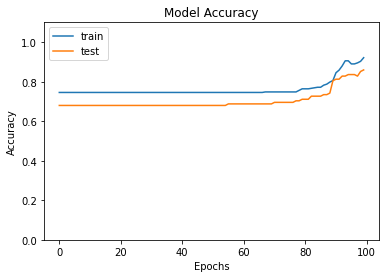

In [47]:
# Plotting for training and testing data
plt.plot(model_fit.history['accuracy'],label='train')
plt.plot(model_fit.history['val_accuracy'],label='test')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.legend(loc='best')

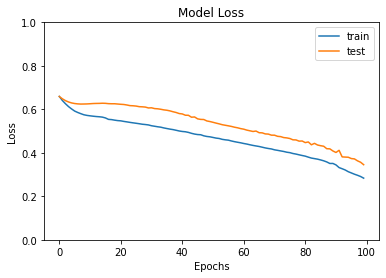

In [48]:
# Plotting for training and testing data
plt.plot(model_fit.history['loss'],label='train')
plt.plot(model_fit.history['val_loss'],label='test')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,1)
plt.legend(loc='best')


# Gas Turbine

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

1. Variable (Abbr.) Unit Min Max Mean
2. Ambient temperature (AT) C â€“6.23 37.10 17.71
3. Ambient pressure (AP) mbar 985.85 1036.56 1013.07
4. Ambient humidity (AH) (%) 24.08 100.20 77.87
5. Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
6. Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
7. Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
8. Turbine after temperature (TAT) C 511.04 550.61 546.16
9. Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
10. Turbine energy yield (TEY) MWH 100.02 179.50 133.51
11. Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
12. Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [49]:
df2=pd.read_csv("https://raw.githubusercontent.com/AliHumadi2000/Neual-Network/main/gas_turbines.csv")

In [50]:
df2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


The Target variable is Continuos, hence it will be a Regression problem.

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [52]:
df2.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [53]:
# Scaling the data
def scale(x):
    x=(x-x.min())/(x.max()-x.min())
    return x

In [54]:
df_temp=df2

In [55]:
df_temp

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [56]:
y=df_temp.iloc[:,7]

In [57]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [58]:
df2.drop(columns='TEY',inplace=True)

In [59]:
df2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [60]:
x=scale(df2.iloc[:,:])

In [61]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [62]:
# Feature--> 10

In [63]:
# model creation

reg_model=tf.keras.models.Sequential()
reg_model.add(tf.keras.layers.Dense(35,input_dim=10,activation='relu'))
reg_model.add(tf.keras.layers.Dense(15,activation='relu'))
reg_model.add(tf.keras.layers.Dense(5,activation='relu'))
reg_model.add(tf.keras.layers.Dense(1,activation='linear'))

In [64]:
reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 35)                385       
                                                                 
 dense_4 (Dense)             (None, 15)                540       
                                                                 
 dense_5 (Dense)             (None, 5)                 80        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compiling the model
reg_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [66]:
# Fit the model
reg_model_fit=reg_model.fit(x,y,validation_split=0.2,epochs=100,batch_size=200)

Epoch 1/100
61/61 [==============================] - 1s 4ms/step - loss: 18155.6934 - mean_squared_error: 18155.6934 - val_loss: 16722.2012 - val_mean_squared_error: 16722.2012
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 15890.0996 - mean_squared_error: 15890.0996 - val_loss: 12352.7070 - val_mean_squared_error: 12352.7070
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 8362.3994 - mean_squared_error: 8362.3994 - val_loss: 2860.9888 - val_mean_squared_error: 2860.9888
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 808.0622 - mean_squared_error: 808.0622 - val_loss: 32.5946 - val_mean_squared_error: 32.5946
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 54.6047 - mean_squared_error: 54.6047 - val_loss: 28.9969 - val_mean_squared_error: 28.9969
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 51.0667 - mean_squared_error: 51.0667 - val_loss: 26.9155 - val_mean

In [67]:
scores=reg_model.evaluate(x,y)
scores

470/470 [==============================] - 1s 1ms/step - loss: 0.7066 - mean_squared_error: 0.7066


[0.7065585255622864, 0.7065585255622864]

In [68]:
reg_model.metrics_names

['loss', 'mean_squared_error']

In [69]:
print("MSE ::",scores[1])

MSE :: 0.7065585255622864


In [70]:
reg_model_fit.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

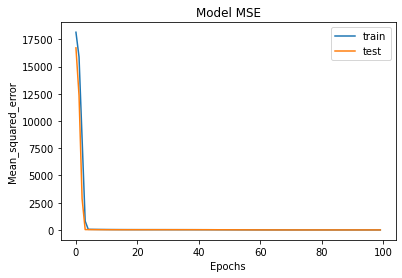

In [71]:
# Plotting for training and testing data
plt.plot(reg_model_fit.history['mean_squared_error'],label='train')
plt.plot(reg_model_fit.history['val_mean_squared_error'],label='test')
plt.title("Model MSE")
plt.xlabel("Epochs")
plt.ylabel("Mean_squared_error")
#plt.ylim(0,1)
plt.legend(loc='best')

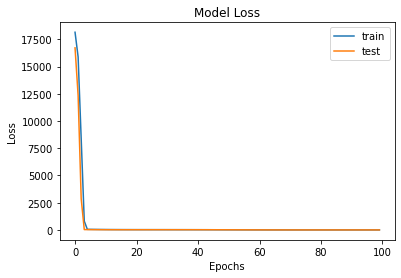

In [72]:
# Plotting for training and testing data
plt.plot(reg_model_fit.history['loss'],label='train')
plt.plot(reg_model_fit.history['val_loss'],label='test')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim(0,1)
plt.legend(loc='best')

In [73]:
x['predict']=reg_model.predict(x)

In [74]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,predict
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,116.121696
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,116.220566
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,116.302063
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,116.317886
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,116.160080
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,111.400543
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,111.667564
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,110.176651
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,111.498589


In [75]:
x['actual']=y

In [76]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,predict,actual
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,116.121696,114.70
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,116.220566,114.72
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,116.302063,114.71
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,116.317886,114.72
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,116.160080,114.72
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,111.400543,111.61
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,111.667564,111.78
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,110.176651,110.19
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,111.498589,110.74
